In [1]:
import pandas as pd

data = pd.read_csv('data/advertising.csv')

print(data.shape[0], 'records')
data.head()

1000 records


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


### Numeric variables analysis

In [3]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


### Distribution of *Age*

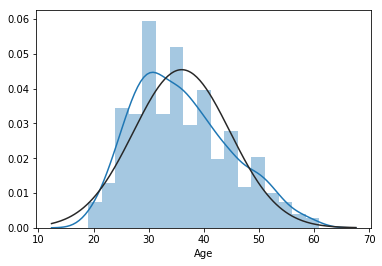

In [4]:
from scipy.stats import norm
import seaborn as sns

sns.distplot(data['Age'], fit=norm)

### Interdependence of *Age* and *Time Spent on Site*

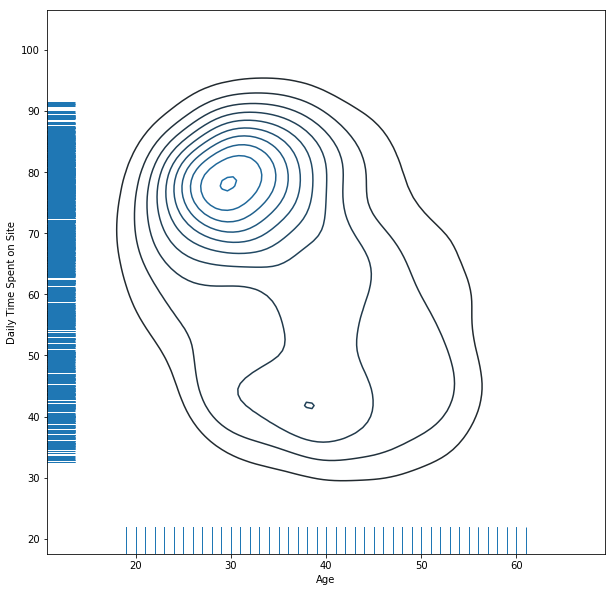

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.kdeplot(data['Age'], data['Daily Time Spent on Site'])
sns.rugplot(data['Age'])
sns.rugplot(data['Daily Time Spent on Site'], vertical=True)
plt.show()

### Interdependence of *Time Spent on Site* and *Daily Internet Usage*

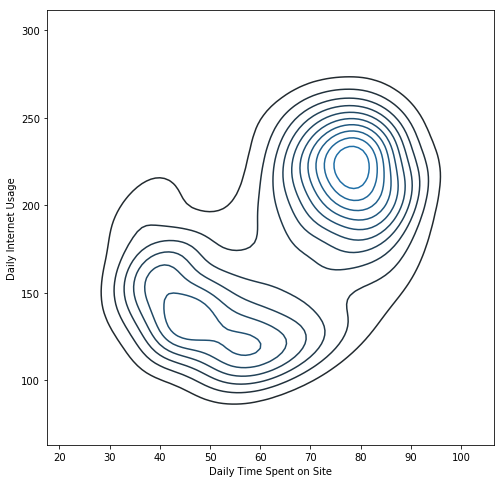

In [6]:
plt.figure(figsize=(8, 8))
sns.kdeplot(data["Daily Time Spent on Site"], data['Daily Internet Usage'])
plt.show()

### Site usage Trends based on numerical variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1059f1668>,
      dtype=object)

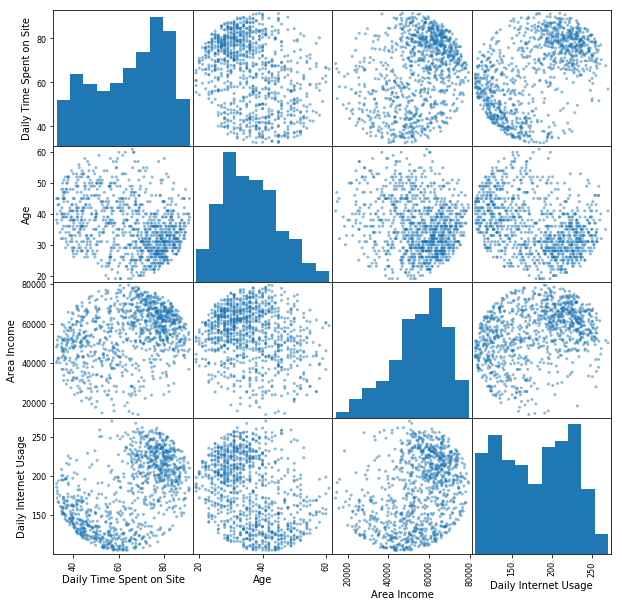

In [7]:
from pandas import plotting

plotting.scatter_matrix(data[['Daily Time Spent on Site', 'Age', 
                              'Area Income', 'Daily Internet Usage']],
                        figsize=(10, 10))

### Categorical variables analysis

In [8]:
data[['Ad Topic Line', 'City', 'Country']].describe(include=['O'])

,Ad Topic Line,City,Country
count,1000,1000,1000
unique,1000,969,237
top,User-centric discrete success,Lisamouth,Czech Republic
freq,1,3,9


In [9]:
pd.crosstab(index=data['Country'], columns='count').sort_values(['count'], ascending=False).head(20)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8
